# Multiclass Image Classification using CNN and transfer learning on Weather images.

In [14]:
import os
import warnings
warnings.filterwarnings('ignore')
import random
from keras.models import Model
from keras import optimizers
from keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras.applications.xception import Xception
from keras.applications.xception import preprocess_input
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications import EfficientNetV2L
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import pathlib
import numpy as np
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import os
import cv2
import random
from shutil import copyfile
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.utils import array_to_img
from tensorflow.keras.utils import load_img

In [1]:
pip install netron

Note: you may need to restart the kernel to use updated packages.


In [19]:
# Get all the paths
data_dir_list = os.listdir("C:/Users/seema/Desktop/DLAI_FInal_Project/Multi-class Weather Dataset-group1/Multi-class Weather Dataset-group1")
print(data_dir_list)
path, dirs, files = next(os.walk("C:/Users/seema/Desktop/DLAI_FInal_Project/Multi-class Weather Dataset-group1/Multi-class Weather Dataset-group1"))
file_count = len(files)
# print(file_count)

['Cloudy', 'Rain', 'Shine', 'Sunrise']


In [25]:
# Making new base directory, for creating training and test set
original_dataset_dir = 'C:/Users/seema/Desktop/DLAI_FInal_Project/Multi-class Weather Dataset-group1/Multi-class Weather Dataset-group1'
base_dir = 'C:/Users/seema/Desktop/DLAI_FInal_Project/Multi-class Weather Dataset-group1/Weather_image_data/'
os.mkdir(base_dir)

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'C:/Users/seema/Desktop/DLAI_FInal_Project/Multi-class Weather Dataset-group1/Weather_image_data/'

In [21]:
#create two folders (train and test)
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'test')
os.mkdir(validation_dir)

#Under train folder create four folders 
# (Cloud, Rain, Shine, Sunrise)

train_cloud_dir = os.path.join(train_dir, 'cloudy')
os.mkdir(train_cloud_dir)

train_rainy_dir = os.path.join(train_dir, 'rainy')
os.mkdir(train_rainy_dir)

train_shine_dir = os.path.join(train_dir, 'shine')
os.mkdir(train_shine_dir)

train_sunrise_dir = os.path.join(train_dir, 'sunrise')
os.mkdir(train_sunrise_dir)

#Under test folder create four folders 
# (Cloud, Rain, Shine, Sunrise)

validation_cloud_dir = os.path.join(validation_dir, 'cloudy')
os.mkdir(validation_cloud_dir)

validation_rainy_dir = os.path.join(validation_dir, 'rainy')
os.mkdir(validation_rainy_dir)

validation_shine_dir = os.path.join(validation_dir, 'shine')
os.mkdir(validation_shine_dir)

validation_sunrise_dir = os.path.join(validation_dir, 'sunrise')
os.mkdir(validation_sunrise_dir)



In [22]:
#This function has been created in order to copy the images from our original data file into the new
# training and test folders we have created, we are giving 4 arguments to the function, source

def split_data(SOURCE, TRAINING, TEST, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + '/' + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    test_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    test_set = shuffled_set[training_length:]

    for filename in training_set:
        this_file = SOURCE + '/' + filename
        destination = TRAINING + '/' +filename
        copyfile(this_file, destination)

    for filename in test_set:
        this_file =  SOURCE + '/' + filename
        destination = TEST + '/' + filename
        copyfile(this_file, destination)

In [24]:
# The code below has been used 4 times, to create the training and testing data for the 4 seasons.

CLOUDY_SOURCE_DIR = 'C:/Users/seema/Desktop/DLAI_FInal_Project/Multi-class Weather Dataset-group1/Multi-class Weather Dataset-group1/Cloudy'
TRAINING_CLOUDY_DIR = 'C:/Users/seema/Desktop/DLAI_FInal_Project/Multi-class Weather Dataset-group1/Weather_image_data/train/cloudy'
TEST_CLOUDY_DIR = 'C:/Users/seema/Desktop/DLAI_FInal_Project/Multi-class Weather Dataset-group1/Weather_image_data/test/cloudy'

RAINY_SOURCE_DIR = 'C:/Users/seema/Desktop/DLAI_FInal_Project/Multi-class Weather Dataset-group1/Multi-class Weather Dataset-group1/Rain'
TRAINING_RAINY_DIR = 'C:/Users/seema/Desktop/DLAI_FInal_Project/Multi-class Weather Dataset-group1/Weather_image_data/train/rainy'
TEST_RAINY_DIR = 'C:/Users/seema/Desktop/DLAI_FInal_Project/Multi-class Weather Dataset-group1/Weather_image_data/test/rainy'

SHINE_SOURCE_DIR = 'C:/Users/seema/Desktop/DLAI_FInal_Project/Multi-class Weather Dataset-group1/Multi-class Weather Dataset-group1/Shine'
TRAINING_SHINE_DIR = 'C:/Users/seema/Desktop/DLAI_FInal_Project/Multi-class Weather Dataset-group1/Weather_image_data/train/shine'
TEST_SHINE_DIR = 'C:/Users/seema/Desktop/DLAI_FInal_Project/Multi-class Weather Dataset-group1/Weather_image_data/test/shine'

SUNRISE_SOURCE_DIR = 'C:/Users/seema/Desktop/DLAI_FInal_Project/Multi-class Weather Dataset-group1/Multi-class Weather Dataset-group1/Sunrise'
TRAINING_SUNRISE_DIR = 'C:/Users/seema/Desktop/DLAI_FInal_Project/Multi-class Weather Dataset-group1/Weather_image_data/train/sunrise'
TEST_SUNRISE_DIR = 'C:/Users/seema/Desktop/DLAI_FInal_Project/Multi-class Weather Dataset-group1/Weather_image_data/test/sunrise'

In [24]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Exploratory Data Analysis

In [26]:
TRAINING_DIR = 'C:/Users/seema/Desktop/DLAI_FInal_Project/Multi-class Weather Dataset-group1/Weather_image_data/train'
TEST_DIR = 'C:/Users/seema/Desktop/DLAI_FInal_Project/Multi-class Weather Dataset-group1/Weather_image_data/test'

Found 0 images belonging to 4 classes.


In [31]:
import os
import random
from shutil import copyfile

split_size = .85

split_data(CLOUDY_SOURCE_DIR, TRAINING_CLOUDY_DIR, TEST_CLOUDY_DIR, split_size)
split_data(RAINY_SOURCE_DIR, TRAINING_RAINY_DIR, TEST_RAINY_DIR, split_size)
split_data(SHINE_SOURCE_DIR, TRAINING_SHINE_DIR, TEST_SHINE_DIR, split_size)
split_data(SUNRISE_SOURCE_DIR, TRAINING_SUNRISE_DIR, TEST_SUNRISE_DIR, split_size)

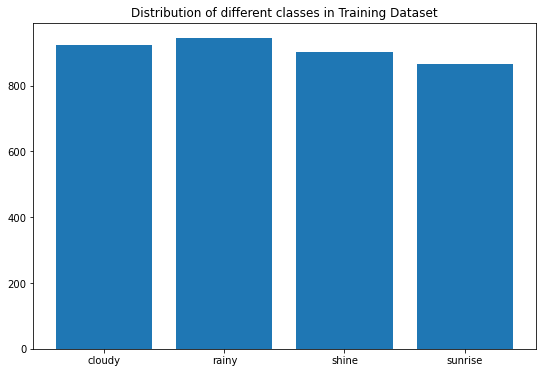

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import pathlib

image_folder = ['cloudy','rainy', 'shine', 'sunrise']
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('C:/Users/seema/Desktop/DLAI_FInal_Project/Multi-class Weather Dataset-group1/Weather_image_data/train/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Training Dataset')
plt.show()

In [33]:
for i in ['cloudy', 'rainy', 'shine', 'sunrise']:
    print('Training {} images are: '.format(i)+str(len(os.listdir('C:/Users/seema/Desktop/DLAI_FInal_Project/Multi-class Weather Dataset-group1/Weather_image_data/train/'+i+'/'))))

Training cloudy images are: 923
Training rainy images are: 944
Training shine images are: 902
Training sunrise images are: 867


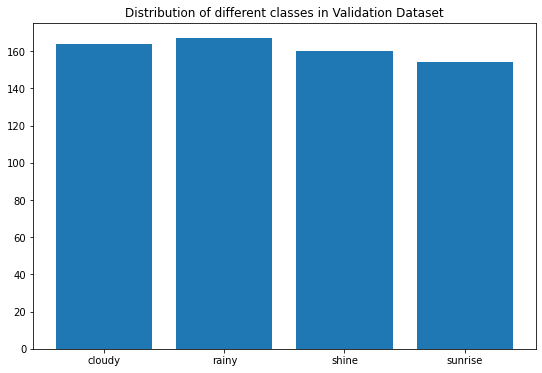

In [34]:
image_folder = ['cloudy','rainy', 'shine', 'sunrise']
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('C:/Users/seema/Desktop/DLAI_FInal_Project/Multi-class Weather Dataset-group1/Weather_image_data/test/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Validation Dataset')
plt.show()

In [35]:
for i in ['cloudy', 'rainy', 'shine', 'sunrise']:
    print('Test {} images are: '.format(i)+str(len(os.listdir('C:/Users/seema/Desktop/DLAI_FInal_Project/Multi-class Weather Dataset-group1/Weather_image_data/test/'+i+'/'))))

Test cloudy images are: 164
Test rainy images are: 167
Test shine images are: 160
Test sunrise images are: 154


In [16]:
img_width=224; img_height=224 #We have to change the input and the output layers, as we are retaining the weights
# of only hidden or convilutional layers, but since our input image size and number of output classes
# in our case, change, we have to set them accordingly
batch_size=1

# Using VGG16 and doing Data Augmentation.

In [17]:
IMAGE_SIZE = [224, 224]
vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [22]:

train_datagen = ImageDataGenerator(
        rotation_range=30,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [29]:
train_datagen = ImageDataGenerator(rescale = 1/255.0,
                                   rotation_range=30,
                                   zoom_range=0.4,
                                   horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    target_size=(img_height, img_width))

Found 3636 images belonging to 4 classes.


In [28]:
test_datagen = ImageDataGenerator(rescale = 1/255.0)


test_generator = test_datagen.flow_from_directory(TEST_DIR,
                                                              batch_size=batch_size,
                                                              class_mode='categorical',
                                                              target_size=(img_height, img_width)
                                                             )

Found 645 images belonging to 4 classes.


In [41]:
for layer in vgg16.layers:
  layer.trainable = False

In [42]:
folders = glob('C:/Users/seema/Desktop/DLAI_FInal_Project/Multi-class Weather Dataset-group1/Weather_image_data/train*')
print(len(folders))

1


In [43]:
x = Flatten()(vgg16.output)
prediction = Dense(4, activation='softmax')(x)
model = Model(inputs=vgg16.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [44]:
from keras import optimizers
adam = optimizers.Adam()
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [45]:
#Give dataset path
train_path = 'C:/Users/seema/Desktop/DLAI_FInal_Project/Multi-class Weather Dataset-group1/Weather_image_data/train'
test_path = 'C:/Users/seema/Desktop/DLAI_FInal_Project/Multi-class Weather Dataset-group1/Weather_image_data/test'

In [46]:
train_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 3636 images belonging to 4 classes.


In [47]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 645 images belonging to 4 classes.


In [48]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint



checkpoint = ModelCheckpoint(filepath='mymodel.h5', 
                               verbose=2, save_best_only=True)

callbacks = [checkpoint]

start = datetime.now()

model_history=model.fit_generator(
  train_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=5,
  validation_steps=32,
    callbacks=callbacks ,verbose=2)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/10

Epoch 1: val_loss improved from inf to 1.84349, saving model to mymodel.h5
5/5 - 111s - loss: 1.9330 - accuracy: 0.3625 - val_loss: 1.8435 - val_accuracy: 0.2754 - 111s/epoch - 22s/step
Epoch 2/10

Epoch 2: val_loss improved from 1.84349 to 1.51441, saving model to mymodel.h5
5/5 - 107s - loss: 1.1712 - accuracy: 0.5750 - val_loss: 1.5144 - val_accuracy: 0.5098 - 107s/epoch - 21s/step
Epoch 3/10

Epoch 3: val_loss improved from 1.51441 to 0.76311, saving model to mymodel.h5
5/5 - 108s - loss: 1.4936 - accuracy: 0.5000 - val_loss: 0.7631 - val_accuracy: 0.6738 - 108s/epoch - 22s/step
Epoch 4/10

Epoch 4: val_loss improved from 0.76311 to 0.58026, saving model to mymodel.h5
5/5 - 108s - loss: 0.7309 - accuracy: 0.7250 - val_loss: 0.5803 - val_accuracy: 0.7812 - 108s/epoch - 22s/step
Epoch 5/10

Epoch 5: val_loss improved from 0.58026 to 0.39325, saving model to mymodel.h5
5/5 - 99s - loss: 0.5979 - accuracy: 0.8000 - val_loss: 0.3933 - val_accuracy: 0.8906 - 99s/epoch - 20s/s

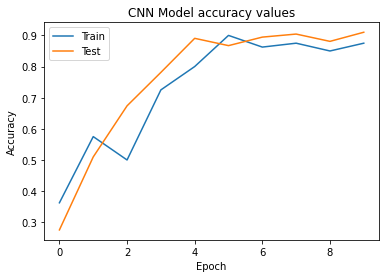

In [49]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('CNN Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

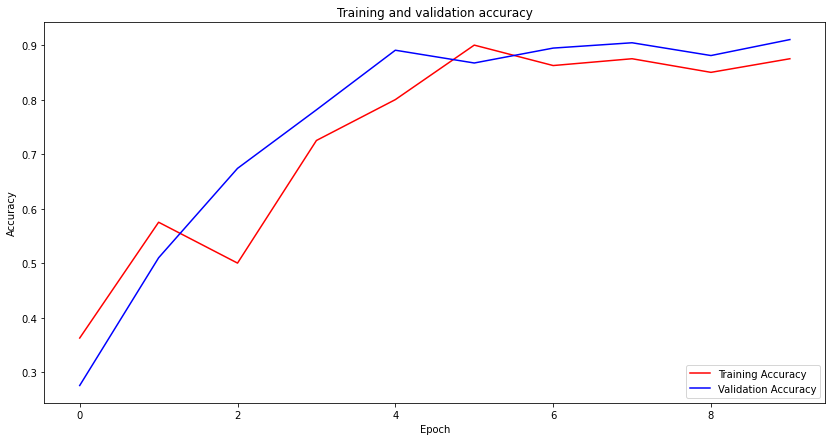

In [50]:
acc=model_history.history['accuracy']
val_acc=model_history.history['val_accuracy']
loss=model_history.history['loss']
val_loss=model_history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Testing Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Graph for loss
fig2 = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Testing Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')

ValueError: in user code:

    File "C:\Users\seema\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py", line 1727, in test_function  *
        return step_function(self, iterator)
    File "C:\Users\seema\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py", line 1713, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\seema\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py", line 1701, in run_step  **
        outputs = model.test_step(data)
    File "C:\Users\seema\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py", line 1667, in test_step
        self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\seema\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py", line 1052, in compute_loss
        return self.compiled_loss(
    File "C:\Users\seema\AppData\Roaming\Python\Python38\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\seema\AppData\Roaming\Python\Python38\site-packages\keras\losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\seema\AppData\Roaming\Python\Python38\site-packages\keras\losses.py", line 272, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\seema\AppData\Roaming\Python\Python38\site-packages\keras\losses.py", line 1990, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\seema\AppData\Roaming\Python\Python38\site-packages\keras\backend.py", line 5529, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 4) are incompatible


# Using VGG19

In [51]:
vgg19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [52]:
for layer in vgg19.layers:
  layer.trainable = False

In [53]:
x = Flatten()(vgg19.output)
prediction = Dense(4, activation='softmax')(x)
model1 = Model(inputs=vgg19.input, outputs=prediction)
model1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [54]:
from keras import optimizers
adam = optimizers.Adam()
model1.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [55]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint



checkpoint = ModelCheckpoint(filepath='mymodel.h5', 
                               verbose=2, save_best_only=True)

callbacks = [checkpoint]

start = datetime.now()

model1_history=model1.fit_generator(
  train_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=5,
  validation_steps=32,
    callbacks=callbacks ,verbose=2)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/10


KeyboardInterrupt: 

In [ ]:
plt.plot(model1_history.history['accuracy'])
plt.plot(model1_history.history['val_accuracy'])
plt.title('CNN Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
#loss
plt.plot(model1_history.history['loss'], label = 'train loss')
plt.plot(model1_history.history['val_loss'], label = 'val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

In [ ]:
acc=model_history.history['accuracy']
val_acc=model_history.history['val_accuracy']
loss=model_history.history['loss']
val_loss=model_history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Testing Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Graph for loss
fig2 = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Testing Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')

# Using Resnet

In [ ]:
res50 = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
for layer in res50.layers:
  layer.trainable = False

In [ ]:
x = Flatten()(res50.output)
prediction = Dense(4, activation='softmax')(x)
model2 = Model(inputs=res50.input, outputs=prediction)
model2.summary()

In [ ]:
from keras import optimizers
adam = optimizers.Adam()
model2.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [ ]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint



checkpoint = ModelCheckpoint(filepath='mymodel.h5', 
                               verbose=2, save_best_only=True)

callbacks = [checkpoint]

start = datetime.now()

model2_history=model2.fit_generator(
  train_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=5,
  validation_steps=32,
    callbacks=callbacks ,verbose=2)


duration = datetime.now() - start
print("Training completed in time: ", duration)

In [ ]:
acc=model2_history.history['accuracy']
val_acc=model2_history.history['val_accuracy']
loss=model2_history.history['loss']
val_loss=model2_history.history['val_loss']


#loss
plt.plot(model2_history.history['loss'], label = 'train loss')
plt.plot(model2_history.history['val_loss'], label = 'val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

In [ ]:
#accuracies
plt.plot(model2_history.history['accuracy'], label = 'train accuracy')
plt.plot(model2_history.history['val_accuracy'], label = 'val accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_accuracy')

# Using Xception

In [ ]:
xception = Xception(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
for layer in xception.layers:
  layer.trainable = False

In [ ]:
x = Flatten()(xception.output)
prediction = Dense(4, activation='softmax')(x)
model3 = Model(inputs=xception.input, outputs=prediction)
model3.summary()

In [ ]:
from keras import optimizers
adam = optimizers.Adam()
model3.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [ ]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint



checkpoint = ModelCheckpoint(filepath='mymodel.h5', 
                               verbose=2, save_best_only=True)

callbacks = [checkpoint]

start = datetime.now()

model3_history=model2.fit_generator(
  train_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=5,
  validation_steps=32,
    callbacks=callbacks ,verbose=2)


duration = datetime.now() - start
print("Training completed in time: ", duration)

In [ ]:
plt.plot(model3_history.history['accuracy'])
plt.plot(model3_history.history['val_accuracy'])
plt.title('CNN Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
#loss
plt.plot(model3_history.history['loss'], label = 'train loss')
plt.plot(model3_history.history['val_loss'], label = 'val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# Using EfficientNetV2L

In [6]:
effv2l = EfficientNetV2L(include_top=False, weights='imagenet')

102645760/473176280 [=====>........................] - ETA: 1:14

KeyboardInterrupt: 

In [ ]:
for layer in effv21.layers:
  layer.trainable = False

In [ ]:
x = Flatten()(effv21.output)
prediction = Dense(4, activation='softmax')(x)
model5 = Model(inputs= effv21.input, outputs=prediction)
model5.summary()

In [7]:
from keras import optimizers
adam = optimizers.Adam()
model5.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

NameError: name 'model3' is not defined

In [ ]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint



checkpoint = ModelCheckpoint(filepath='mymodel.h5', 
                               verbose=2, save_best_only=True)

callbacks = [checkpoint]

start = datetime.now()

model5_history=model5.fit_generator(
  train_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=5,
  validation_steps=32,
    callbacks=callbacks ,verbose=2)


duration = datetime.now() - start
print("Training completed in time: ", duration)

In [ ]:
plt.plot(model5_history.history['accuracy'])
plt.plot(model5_history.history['val_accuracy'])
plt.title('CNN Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
#loss
plt.plot(model5_history.history['loss'], label = 'train loss')
plt.plot(model5_history.history['val_loss'], label = 'val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# Training custom model

In [12]:
callbacks = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
# autosave best Model
best_model_file = '/content/CNN_aug_best_weights.h5'
best_model = ModelCheckpoint(best_model_file, monitor='val_acc', verbose = 1, save_best_only = True)

In [19]:
model_CM = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)), MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'), MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(256, (3, 3), activation='relu'),
    Conv2D(256, (3, 3), activation='relu'),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(4, activation='softmax')
])
model_CM.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 111, 111, 16)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 52, 52, 64)        18496     
                                                                 
 conv2d_12 (Conv2D)          (None, 50, 50, 64)       

In [20]:
model_CM.compile(optimizer='Adam', 
              loss='categorical_crossentropy', 
              metrics =['accuracy'])

In [30]:
history5 = model_CM.fit_generator(train_generator,
                              epochs=18,
                              verbose=1,
                              validation_data= test_generator,
                              callbacks = [best_model]
                              )

Epoch 1/30
 172/3636 [>.............................] - ETA: 8:43 - loss: 1.3896 - accuracy: 0.2035

KeyboardInterrupt: 

In [ ]:
acc=history5.history['accuracy']
val_acc=history5.history['val_accuracy']
loss=history5.history['loss']
val_loss=history5.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
fig2 = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')